<a target="_blank" href="https://colab.research.google.com/github/Richmaninoff/S3-ASIES/blob/master/ASIES_tarea_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

TAREA 1

presentar usando logaritmo cuando hay muchos picos

Con un formato W -> convertir

A.Responda: La edad media del contagiado de dengue vario a través de los años? Fue lo mismo segun gravedad?

B. Responda: La cantidad de casos  vario a través de los años? Fue lo mismo segun gravedad?

C.Responda: Cuales fueron las provincias mas afectadas con contagiados a lo largo de los años?

D. Responda: Qué relación habia entre los casos alarmantes no graves y los asintomaticos segun departamento a lo largo de los años?


### 1. Elementos esenciales

In [3]:
pip install plotnine --user

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import pandas as pd
import pickle

##DATA

In [5]:
Data="https://github.com/SocialAnalytics-StrategicIntelligence/TableOperations/raw/main/dataFiles/ByYear_LongStats.pkl"


In [6]:
print(Data)

https://github.com/SocialAnalytics-StrategicIntelligence/TableOperations/raw/main/dataFiles/ByYear_LongStats.pkl


In [7]:
Datita = pd.read_pickle(Data) # se crea el objeto DF para realizar

In [13]:
Datita

,ano,enfermedad,statsName,statsValue
0,2000,SIN_SEÑALES,edad_mean,29.508788
1,2000,SIN_SEÑALES,edad_median,27.000000
2,2000,SIN_SEÑALES,case_sum,4324.000000
3,2001,SIN_SEÑALES,edad_mean,30.634282
4,2001,SIN_SEÑALES,edad_median,28.000000
...,...,...,...,...
172,2022,ALARMA,edad_median,25.000000
173,2022,ALARMA,case_sum,7370.000000
174,2022,GRAVE,edad_mean,35.146226
175,2022,GRAVE,edad_median,32.000000


In [45]:
DF=pd.DataFrame(Datita) #convertimos a data frame para mejor manipulabilidad

In [20]:
Datacompleta="https://github.com/SocialAnalytics-StrategicIntelligence/TableOperations/raw/main/dataFiles/dengue_ok.pkl"
Dati2= pd.read_pickle(Datacompleta)
DFII=pd.DataFrame(Dati2)

In [21]:
DF1 = DF.rename(columns={"meanage":"edad","statsName":"tipo_valor"},inplace=False)


In [22]:
DFII

,departamento,provincia,distrito,ano,semana,sexo,edad,enfermedad,year
0,HUANUCO,LEONCIO PRADO,LUYANDO,2000,47,M,9,SIN_SEÑALES,2000-01-01
1,HUANUCO,LEONCIO PRADO,LUYANDO,2000,40,F,18,SIN_SEÑALES,2000-01-01
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,48,F,32,SIN_SEÑALES,2000-01-01
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,37,F,40,SIN_SEÑALES,2000-01-01
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,2000,42,M,16,SIN_SEÑALES,2000-01-01
...,...,...,...,...,...,...,...,...,...
398938,SAN MARTIN,SAN MARTIN,TARAPOTO,2022,13,M,17,SIN_SEÑALES,2022-01-01
398939,PIURA,SECHURA,SECHURA,2022,13,F,48,SIN_SEÑALES,2022-01-01
398940,PIURA,PIURA,LA UNION,2022,52,M,24,SIN_SEÑALES,2022-01-01
398941,LORETO,MAYNAS,IQUITOS,2022,51,M,26,SIN_SEÑALES,2022-01-01


In [23]:
denguelink3='https://raw.githubusercontent.com/SocialAnalytics-StrategicIntelligence/TableOperations/main/dataFiles/ByYearPlace.pkl'
Dati3= pd.read_pickle(denguelink3)
preg_d=pd.DataFrame(Dati3)

In [24]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ano         177 non-null    int64   
 1   enfermedad  177 non-null    category
 2   tipo_valor  177 non-null    object  
 3   statsValue  177 non-null    float64 
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 4.5+ KB


In [25]:
DF.shape

(177, 4)

La información procesada en esta data muestra que el DF tiene 4 variables y 117  datos

In [26]:
DF = DF.assign(case=1) #para crear una columna que permita contar los casos, etc.

## Parte 1: preguntas A y B
  A. La edad media del contagiado de dengue vario a través de los años? Fue lo mismo segun gravedad?

  B. Responda: La cantidad de casos  vario a través de los años? Fue lo mismo segun gravedad?

Ambas preguntas se pueden responder visualizando la tabla de la evolución de la enfermedad, al igual que con una gráfica lineal de facetas o faceteada según las medidas.Antes de procesar las variables, es conveniente visualizar la forma de cada uno.A continuación las categorias según la gravedad de la enfermedad

In [64]:
DF["enfermedad"].value_counts()

enfermedad
SIN_SEÑALES    69
GRAVE          66
ALARMA         42
Name: count, dtype: int64

In [28]:
DF["ano"]

0      2000
1      2000
2      2000
3      2001
4      2001
       ... 
172    2022
173    2022
174    2022
175    2022
176    2022
Name: ano, Length: 177, dtype: int64

In [29]:
DF["enfermedad"]

0      SIN_SEÑALES
1      SIN_SEÑALES
2      SIN_SEÑALES
3      SIN_SEÑALES
4      SIN_SEÑALES
          ...     
172         ALARMA
173         ALARMA
174          GRAVE
175          GRAVE
176          GRAVE
Name: enfermedad, Length: 177, dtype: category
Categories (3, object): ['SIN_SEÑALES' < 'ALARMA' < 'GRAVE']

In [48]:
resumen = DF["statsValue"].describe() #statsValue=edad promedio
print(resumen)

count      177.000000
mean      2272.162135
std       6761.714935
min          1.000000
25%         26.754755
50%         29.680556
75%        123.000000
max      48625.000000
Name: statsValue, dtype: float64


In [67]:
DF

,ano,enfermedad,statsName,statsValue
0,2000,SIN_SEÑALES,edad_mean,29.508788
1,2000,SIN_SEÑALES,edad_median,27.000000
2,2000,SIN_SEÑALES,case_sum,4324.000000
3,2001,SIN_SEÑALES,edad_mean,30.634282
4,2001,SIN_SEÑALES,edad_median,28.000000
...,...,...,...,...
172,2022,ALARMA,edad_median,25.000000
173,2022,ALARMA,case_sum,7370.000000
174,2022,GRAVE,edad_mean,35.146226
175,2022,GRAVE,edad_median,32.000000


In [60]:
TablaXX = DFII.groupby("ano").agg(media=("edad", "mean")).reset_index()
print(TablaXX)
#Tabla2 = DF.groupby("ano").agg(media=("edad", "mean")).reset_index()
#print(Tabla2)

     ano      media
0   2000  29.508788
1   2001  30.648335
2   2002  26.946607
3   2003  28.995113
4   2004  28.841623
5   2005  26.881157
6   2006  27.420893
7   2007  28.713348
8   2008  28.935695
9   2009  30.168587
10  2010  31.374257
11  2011  28.914019
12  2012  27.684140
13  2013  27.853501
14  2014  28.496008
15  2015  31.608002
16  2016  31.008397
17  2017  33.324255
18  2018  30.111868
19  2019  29.551028
20  2020  29.095285
21  2021  29.409274
22  2022  30.044816


In [34]:
#luego, importamos la libreria que permitirá crear los gráficos
import plotnine as plot


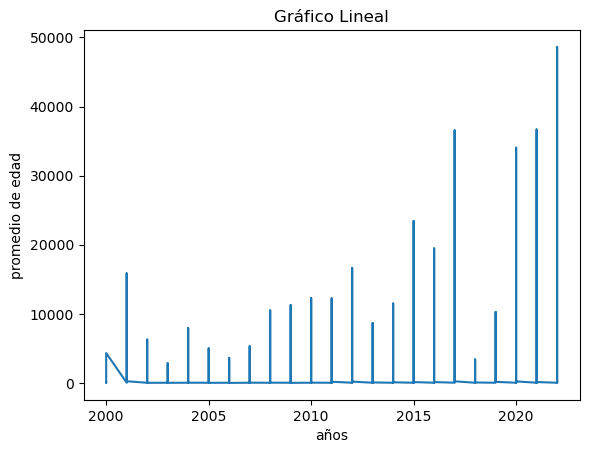

In [61]:
import matplotlib.pyplot as plt

# Supongamos que hay un DataFrame llamado 'df' con las columnas 'x' y 'y'

plt.plot(DF['ano'], DF['statsValue'])
plt.xlabel('años')
plt.ylabel('promedio de edad')
plt.title('Gráfico Lineal')
plt.show()


In [62]:
DF

,ano,enfermedad,statsName,statsValue
0,2000,SIN_SEÑALES,edad_mean,29.508788
1,2000,SIN_SEÑALES,edad_median,27.000000
2,2000,SIN_SEÑALES,case_sum,4324.000000
3,2001,SIN_SEÑALES,edad_mean,30.634282
4,2001,SIN_SEÑALES,edad_median,28.000000
...,...,...,...,...
172,2022,ALARMA,edad_median,25.000000
173,2022,ALARMA,case_sum,7370.000000
174,2022,GRAVE,edad_mean,35.146226
175,2022,GRAVE,edad_median,32.000000


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_3924\2413823373.py:8: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\Ricardo\AppData\Roaming\Python\Python311\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Ricardo\AppData\Roaming\Python\Python311\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Ricardo\AppData\Roaming\Python\Python311\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Ricardo\AppData\Roaming\Python\Python311\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Ricardo\AppData\Roaming\Python\Python311\site-packages\pl

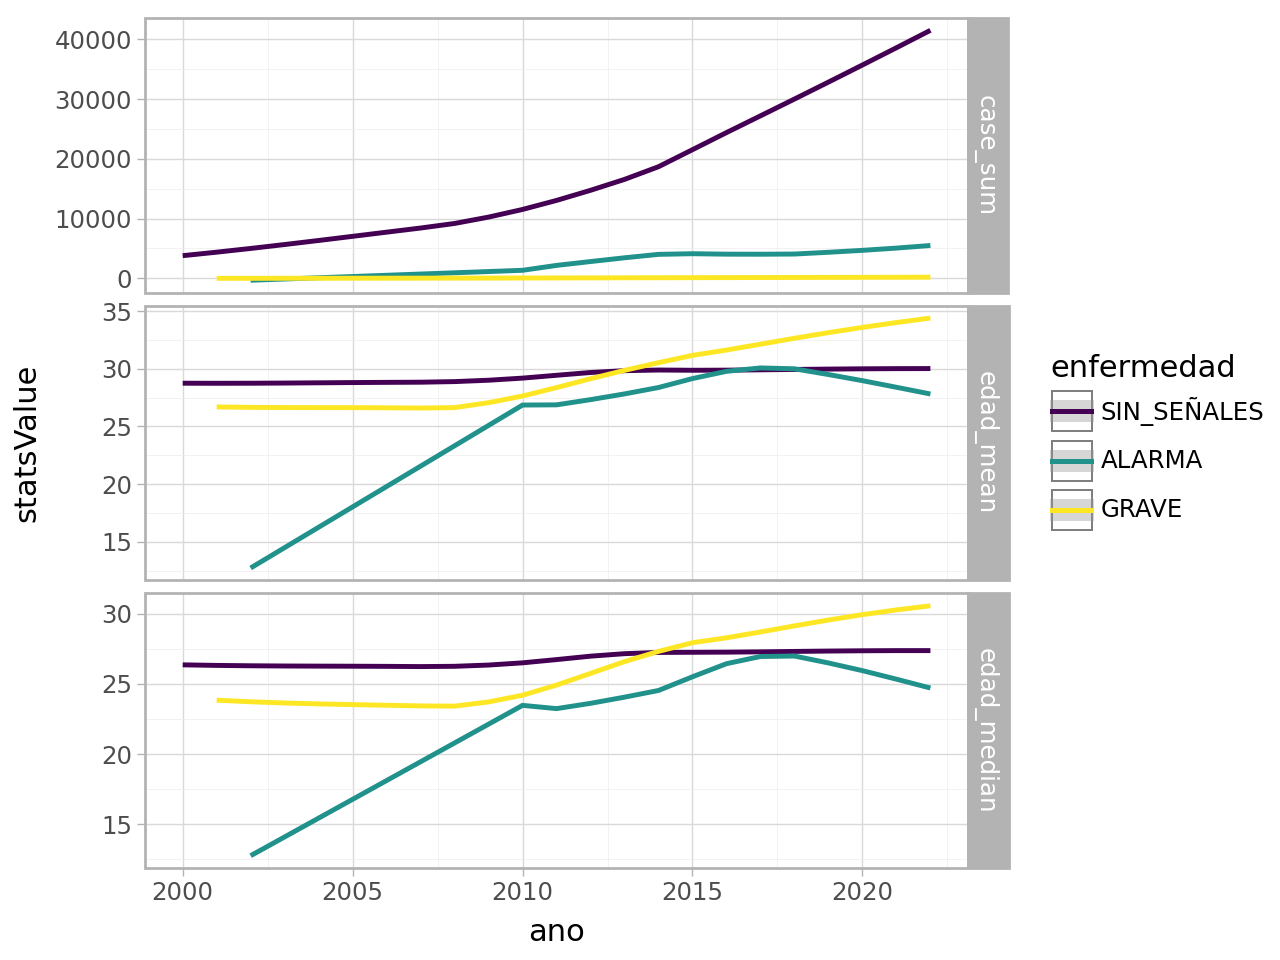

In [63]:
from plotnine import ggplot, aes, geom_smooth, facet_grid, scale_y_log10, theme_light

facets = (ggplot(data=DF, mapping=aes(x="ano", y="statsValue", color="enfermedad"))
          + theme_light()
          + geom_smooth()
          + facet_grid("statsName~.", scales="free_y"))

print(facets)

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_3924\1286099216.py:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\Ricardo\AppData\Roaming\Python\Python311\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Ricardo\AppData\Roaming\Python\Python311\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Ricardo\AppData\Roaming\Python\Python311\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Ricardo\AppData\Roaming\Python\Python311\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Ricardo\AppData\Roaming\Python\Python311\site-packages\p

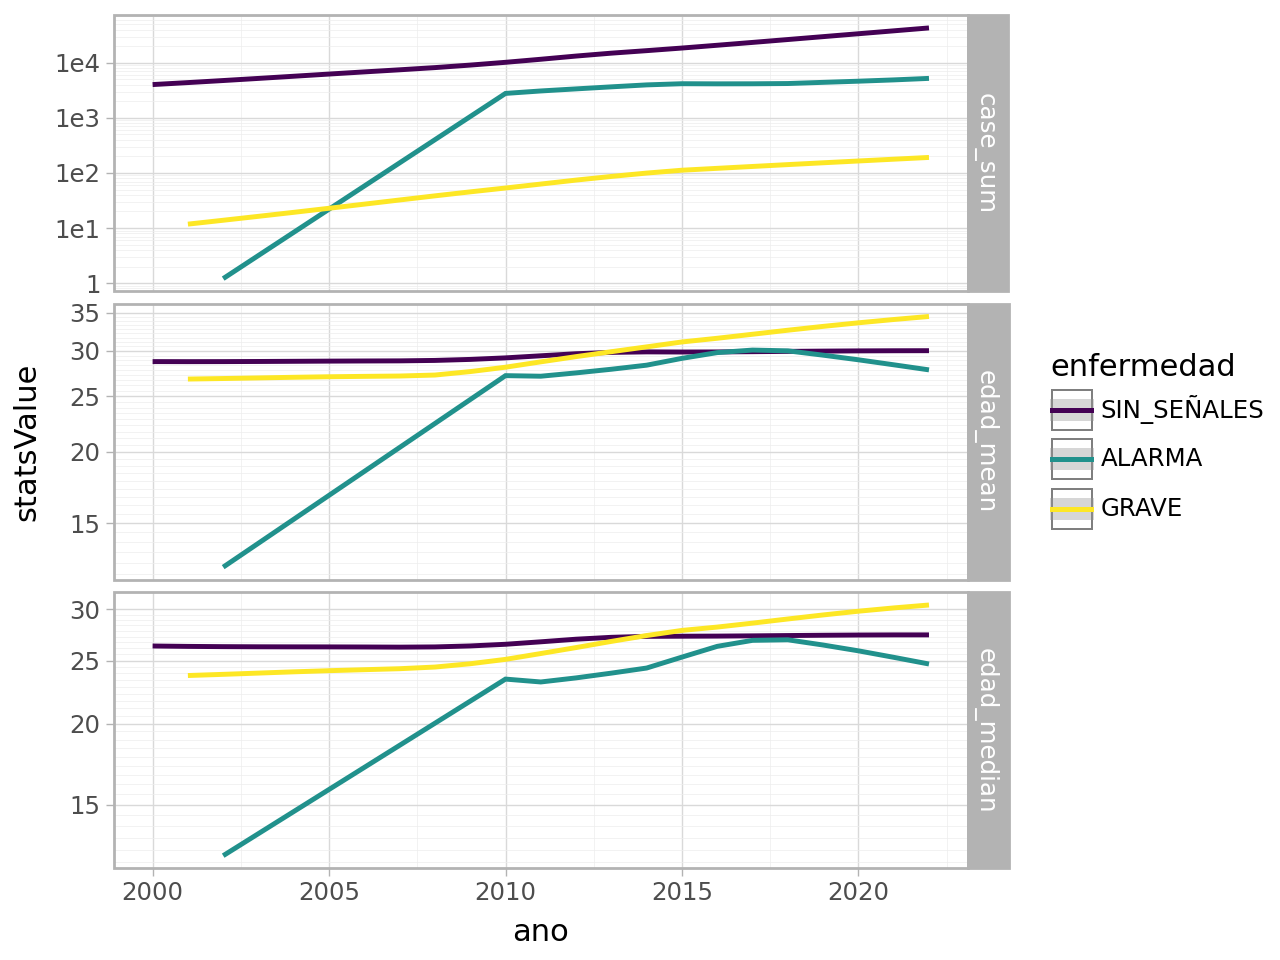

In [65]:
#Ahora un gráfico que ha logaritmizado la cantidad total de contagios
from plotnine import ggplot, aes, geom_smooth, facet_grid, scale_y_log10, theme_light

facets = (ggplot(data=DF, mapping=aes(x="ano", y="statsValue", color="enfermedad"))
          + theme_light()
          + scale_y_log10()
          + geom_smooth()
          + facet_grid("statsName~.", scales="free_y"))

print(facets)

Análisis
Pregunta A: la edad media de contagios se mantiene en la edad adulta desde aproximadamente los 25 años hasta 35. Lo interesante resulta que el promedio de edad de casos alamar no grave han ido aumentando. La explicación más sugerente sería que los menores eran más veces diagnosticados con ese nivel de gravedad, pero que con el tiempo se ha ido acoplando a las tendencias de las dempas categorías.

Pregunta B
La cantidad de casos a incrementado enormemente. Lo que no corresponde con el incremento de los casos de gravedad que se han mantenido relativamente constante. Ello, posiblemente implica un mayor testeo de la enfermedad y un mejor control de esta misma. Sin embargo, todavía resulta importante considerar que el imcremento es sostenido y con ello, se entiende que la enfermedad sigue propagandose, las personas se contagian más, aunque no de modo más grave.


## Parte 2: pregunta C

C.Responda: Cuales fueron las provincias mas afectadas con contagiados a lo largo de los años?



In [26]:
DFII

,departamento,provincia,distrito,ano,semana,sexo,edad,enfermedad,year
0,HUANUCO,LEONCIO PRADO,LUYANDO,2000,47,M,9,SIN_SEÑALES,2000-01-01
1,HUANUCO,LEONCIO PRADO,LUYANDO,2000,40,F,18,SIN_SEÑALES,2000-01-01
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,48,F,32,SIN_SEÑALES,2000-01-01
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,37,F,40,SIN_SEÑALES,2000-01-01
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,2000,42,M,16,SIN_SEÑALES,2000-01-01
...,...,...,...,...,...,...,...,...,...
398938,SAN MARTIN,SAN MARTIN,TARAPOTO,2022,13,M,17,SIN_SEÑALES,2022-01-01
398939,PIURA,SECHURA,SECHURA,2022,13,F,48,SIN_SEÑALES,2022-01-01
398940,PIURA,PIURA,LA UNION,2022,52,M,24,SIN_SEÑALES,2022-01-01
398941,LORETO,MAYNAS,IQUITOS,2022,51,M,26,SIN_SEÑALES,2022-01-01


In [27]:
DFII = DFII.assign(case=1)

In [28]:
DFII.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398943 entries, 0 to 398942
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   departamento  398943 non-null  object        
 1   provincia     398943 non-null  object        
 2   distrito      398943 non-null  object        
 3   ano           398943 non-null  int64         
 4   semana        398943 non-null  int64         
 5   sexo          398943 non-null  object        
 6   edad          398943 non-null  int64         
 7   enfermedad    398943 non-null  category      
 8   year          398931 non-null  datetime64[ns]
 9   case          398943 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 27.8+ MB


In [29]:
DFII["provincia"].describe() #statsValue=edad promedio


count     398943
unique       110
top       MAYNAS
freq       49073
Name: provincia, dtype: object

In [30]:
# Agrupar por año y distrito y sumar las personas testeadas en cada grupo
DFIIX =DFII.groupby(["ano", "departamento", "distrito"]).agg({"case": "sum"}).reset_index()

# Renombrar la columna para que sea más clara
DFIIX.rename(columns={'case': 'total'}, inplace=True)

# Mostrar el nuevo DataFrame
print(DFIIX)

       ano departamento      distrito  total
0     2000     AMAZONAS         BAGUA    215
1     2000     AMAZONAS  BAGUA GRANDE     38
2     2000     AMAZONAS      CAJARURO      5
3     2000     AMAZONAS         CUMBA     14
4     2000     AMAZONAS         YAMON      1
...    ...          ...           ...    ...
4884  2022      UCAYALI      RAIMONDI    531
4885  2022      UCAYALI       SEPAHUA     32
4886  2022      UCAYALI      TAHUANIA     71
4887  2022      UCAYALI   YARINACOCHA    875
4888  2022      UCAYALI         YURUA      2

[4889 rows x 4 columns]


In [31]:
DFIIX

,ano,departamento,distrito,total
0,2000,AMAZONAS,BAGUA,215
1,2000,AMAZONAS,BAGUA GRANDE,38
2,2000,AMAZONAS,CAJARURO,5
3,2000,AMAZONAS,CUMBA,14
4,2000,AMAZONAS,YAMON,1
...,...,...,...,...
4884,2022,UCAYALI,RAIMONDI,531
4885,2022,UCAYALI,SEPAHUA,32
4886,2022,UCAYALI,TAHUANIA,71
4887,2022,UCAYALI,YARINACOCHA,875


In [32]:
max_contagios_por_año = DFIIX.loc[DFIIX.groupby("ano")['total'].idxmax()]

# Mostrar los resultados
print(max_contagios_por_año)

       ano   departamento     distrito  total
49    2000          PIURA      SULLANA   1301
222   2001          PIURA      SULLANA   2042
402   2002        UCAYALI     CALLERIA   1150
486   2003          PIURA      SULLANA    757
588   2004         LORETO      IQUITOS    931
701   2005      CAJAMARCA         JAEN    733
908   2006         LORETO      IQUITOS    570
1025  2007    LA LIBERTAD  EL PORVENIR    659
1200  2008         LORETO      IQUITOS   1932
1364  2009         LORETO      IQUITOS   1244
1595  2010          PIURA        PIURA   1602
1710  2011         LORETO      IQUITOS   2743
2047  2012        UCAYALI     CALLERIA   2595
2115  2013         LORETO      IQUITOS   1422
2320  2014         LORETO      IQUITOS   1908
2677  2015         TUMBES       TUMBES   2451
2846  2016          PIURA     CASTILLA   1064
3177  2017          PIURA        PIURA   3558
3369  2018  MADRE DE DIOS    TAMBOPATA    811
3603  2019  MADRE DE DIOS    TAMBOPATA   2495
4009  2020        UCAYALI     CALL

In [33]:
#ahora para ver no solo el distrito con más contagios, sino los 5 primeros por año
top5_distr_mas_contagios = DFIIX.groupby("ano").apply(lambda x: x.nlargest(5, "total")).reset_index(drop=True)

# Mostramos los resultados
print(top5_distr_mas_contagios)

      ano   departamento      distrito  total
0    2000          PIURA       SULLANA   1301
1    2000    LA LIBERTAD   EL PORVENIR    677
2    2000          PIURA  QUERECOTILLO    306
3    2000          PIURA    BELLAVISTA    256
4    2000         LORETO       IQUITOS    241
..    ...            ...           ...    ...
110  2022  MADRE DE DIOS     TAMBOPATA   2046
111  2022         LORETO    YURIMAGUAS   1938
112  2022      CAJAMARCA          JAEN   1898
113  2022        UCAYALI      CALLERIA   1578
114  2022          CUSCO     SANTA ANA   1402

[115 rows x 4 columns]


In [34]:
#una estrategia util para contabilizar cuantas vaces se repite es añadirle una columna con 1s
top5_distr_mas_contagios = top5_distr_mas_contagios.assign(case=1)

In [35]:
print(top5_distr_mas_contagios)

      ano   departamento      distrito  total  case
0    2000          PIURA       SULLANA   1301     1
1    2000    LA LIBERTAD   EL PORVENIR    677     1
2    2000          PIURA  QUERECOTILLO    306     1
3    2000          PIURA    BELLAVISTA    256     1
4    2000         LORETO       IQUITOS    241     1
..    ...            ...           ...    ...   ...
110  2022  MADRE DE DIOS     TAMBOPATA   2046     1
111  2022         LORETO    YURIMAGUAS   1938     1
112  2022      CAJAMARCA          JAEN   1898     1
113  2022        UCAYALI      CALLERIA   1578     1
114  2022          CUSCO     SANTA ANA   1402     1

[115 rows x 5 columns]


In [36]:
#contabilizamos cuantas veces se repiten los distritos en el top 5 de contagiados por cada año
#mas_veces_en_top_5=top5_distr_mas_contagios.groupby(["ano", "departamento", "distrito"]).agg({"case": "sum"}).reset_index()
# Renombrar la columna para que sea más clara
#mas_veces_en_top_5.rename(columns={'case': 'tot'}, inplace=True)


# Agrupar por departamento y distrito y contar el número de filas en cada grupo
mas_veces_en_top_5 = top5_distr_mas_contagios.groupby(['departamento', 'distrito']).size().reset_index(name='veces_en_el_top')

# Mostrar el nuevo DataFrame
print(mas_veces_en_top_5)

     departamento               distrito  veces_en_el_top
0          ANCASH                  CASMA                1
1        AYACUCHO              LLOCHEGUA                1
2       CAJAMARCA                   JAEN                6
3           CUSCO                PICHARI                1
4           CUSCO              SANTA ANA                1
5         HUANUCO              RUPA-RUPA                1
6             ICA                    ICA                1
7           JUNIN                 PERENE                1
8     LA LIBERTAD            CASA GRANDE                1
9     LA LIBERTAD                 CHEPEN                1
10    LA LIBERTAD            EL PORVENIR                3
11    LA LIBERTAD                 PAIJAN                1
12    LA LIBERTAD               TRUJILLO                1
13     LAMBAYEQUE                CAYALTI                1
14     LAMBAYEQUE              FERRE�AFE                1
15     LAMBAYEQUE                 MOTUPE                1
16     LAMBAYE

In [37]:
mas_veces_en_top_5

,departamento,distrito,veces_en_el_top
0,ANCASH,CASMA,1
1,AYACUCHO,LLOCHEGUA,1
2,CAJAMARCA,JAEN,6
3,CUSCO,PICHARI,1
4,CUSCO,SANTA ANA,1
5,HUANUCO,RUPA-RUPA,1
6,ICA,ICA,1
7,JUNIN,PERENE,1
8,LA LIBERTAD,CASA GRANDE,1
9,LA LIBERTAD,CHEPEN,1


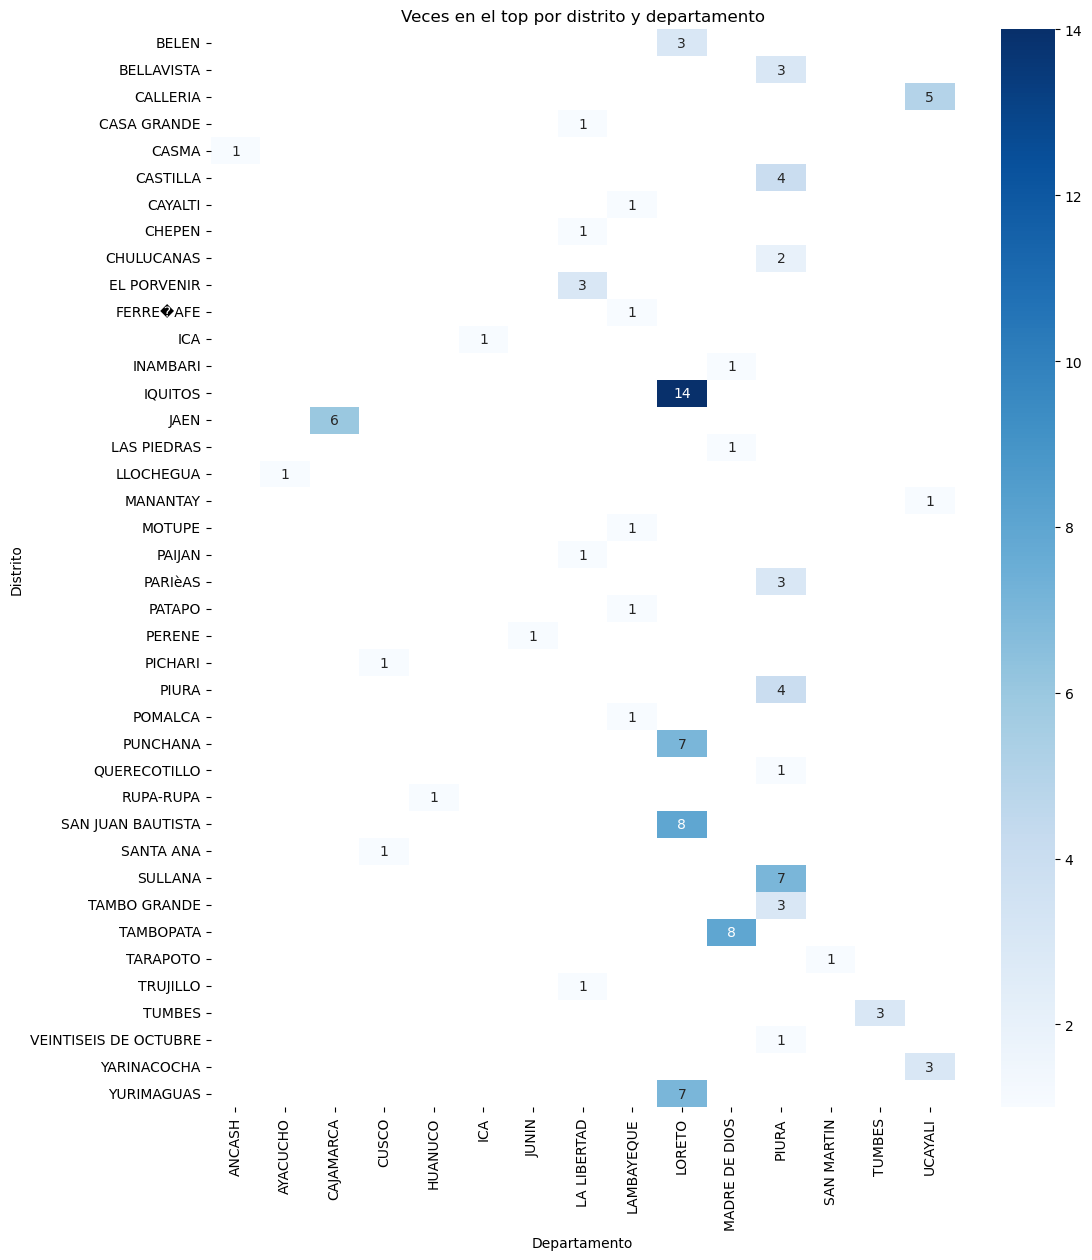

In [38]:
import seaborn as sns
import pandas as pd

# Suponiendo que tienes tu DataFrame llamado df con las columnas departamento, distrito y veces_en_el_top

# Crea un pivot table para convertir tus datos en un formato adecuado para el mapa de calor
pivot_df = mas_veces_en_top_5.pivot_table(index='distrito', columns='departamento', values='veces_en_el_top', aggfunc='sum')

# Crea el mapa de calor
plt.figure(figsize=(12, 14))
sns.heatmap(pivot_df, cmap='Blues', annot=True, fmt='g')
plt.title('Veces en el top por distrito y departamento')
plt.xlabel('Departamento')
plt.ylabel('Distrito')
plt.show()

Análisis: el gráfico demuestra que en los 23 años de recolección de datos, muchos distritos han estado recurrentemente en el top 5 de lugares con más incidencia de la enfermedad. Ello puede estandarizarse tambien, si se proporciona la cantidad de enfermos con la población total. De todos modos, el mapa de calor resulta interesante ya que demuestra una sostenida afectación de distritos a través de tiempo. Lo que resulta alarmante, pues implica la constante vulnerabilidad de sus ciudadanos cada año por el dengue y también implicaría la falta de un plan de solución a largo plazo o de contingencia en tales distritos. Por ejemplo, el departamento de Loreto tiene los distritos que más veces aparecieron como Iquitos, Yurimaguas o Santa Ana.


## Parte 3: pregunta D

D. Responda: Qué relación habia entre los casos alarmantes no graves y los asintomaticos segun departamento a lo largo de los años?


In [39]:
preg_d

,ano,departamento,rateAlarma,rateAlarma.cut
0,2012,AMAZONAS,0.126273,10-25%
1,2012,ANCASH,0.021111,less10%
2,2012,CAJAMARCA,0.177215,10-25%
3,2012,HUANUCO,0.309237,25-50
4,2012,JUNIN,0.061286,less10%
...,...,...,...,...
198,2022,PIURA,0.146407,10-25%
199,2022,PUNO,0.000000,less10%
200,2022,SAN MARTIN,0.280892,25-50
201,2022,TUMBES,0.054878,less10%


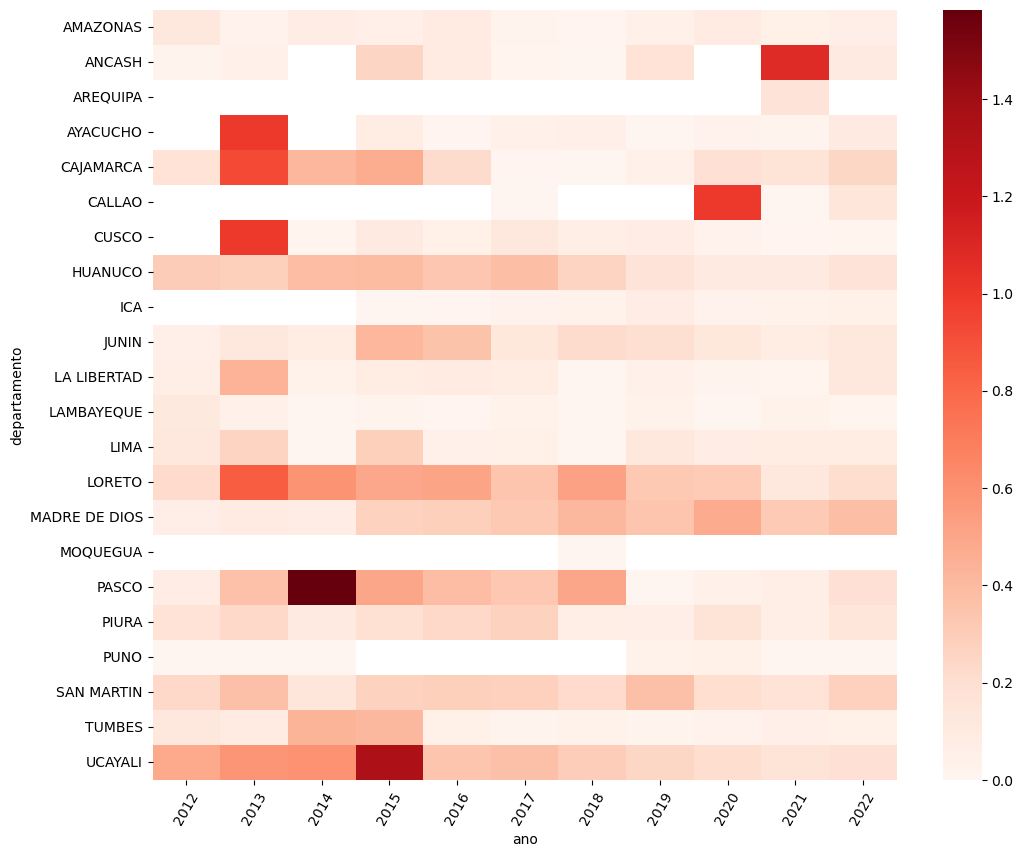

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama df
heatmap_data = preg_d.pivot(index="departamento", columns="ano", values="rateAlarma")

plt.figure(figsize=(12, 10))  # Ajusta el tamaño según sea necesario
sns.heatmap(heatmap_data, cmap="Reds")
plt.xticks(rotation=60)
plt.show()

Análisis: ocurre que con el paso del tiempo, la cantidad de casos alarmantes no graves ha ido disminuyendo en relación a los asintomáticos. Esto indica que ha habido una mayor incidencia de la "transmisión asintomática", que implica una menor gravedad de los casos de dengue con el paso del tiempo. Por ejemplo, si se compara el 2014 en con los años mas recientes, es posible reconocer que a nivel nacional resulta menos grave un contagio de dengue, pues si bien una persona se puede contagiar, ello no implica que se convierta en un caso alarmante. Lo que llama la antención también, es que todavía existen departamentos en los que todaví existe una mayor tasa de casos alarmantes no graves, como Ancash o Callao.

*...Fin de la tarea.*
-Ricardo.